Loading Data    

In [15]:
# Importing modules
import pandas as pd
import os
# Read data into papers
papers = pd.read_csv('full_context_PeerRead.csv')
# Print head
papers.head()

,right_citated_text,left_citated_text,source_abstract,source_author,source_id,source_title,source_venue,source_year,target_id,target_author,target_abstract,target_year,target_title,target_venue
0,andsyntactic parsing .Because RNNs make very f...,We conducted additional experiments on artific...,Deep Neural Networks (DNNs) are powerful model...,ilya sutskever;oriol vinyals;quoc v le,1409.3215v1,Sequence to Sequence Learning with Neural Netw...,NIPS,2014.0,1606.03622v1,robin jia;percy liang,Modeling crisp logical regularities is crucial...,2016,Data Recombination for Neural Semantic Parsing,ACL
1,.Because RNNs make very few domain-specific as...,We conducted additional experiments on artific...,Syntactic parsing is a fundamental problem in ...,oriol vinyals;lukasz kaiser;terry koo;slav pet...,1412.7449v1,Grammar as a Foreign Language,NIPS,2014.0,1606.03622v1,robin jia;percy liang,Modeling crisp logical regularities is crucial...,2016,Data Recombination for Neural Semantic Parsing,ACL
2,"; in a Pointer Network,the only way to generat...","Reproducibility. All code, data, and experimen...",We introduce a new neural architecture to lear...,oriol vinyals;meire fortunato;navdeep jaitly,1506.03134v1,Pointer Networks,NIPS,2015.0,1606.03622v1,robin jia;percy liang,Modeling crisp logical regularities is crucial...,2016,Data Recombination for Neural Semantic Parsing,ACL
3,". Recently, nsur . have shown superior perfor...","st like CWS and POS tagging, automatic prosody...",The recently introduced continuous Skip-gram m...,tomas mikolov;ilya sutskever;kai chen 0010;gre...,1310.4546v1,Distributed Representations of Words and Phras...,NIPS,2013.0,1511.00360v1,chuang ding;lei xie;jie yan;weini zhang;yang liu,Prosody affects the naturalness and intelligib...,2015,Automatic Prosody Prediction for Chinese Speec...,arxiv
4,model trained on the Google News dataset3.In a...,We begin by considering a document as the set ...,The recently introduced continuous Skip-gram m...,tomas mikolov;ilya sutskever;kai chen 0010;gre...,1310.4546v1,Distributed Representations of Words and Phras...,NIPS,2013.0,1705.10900v1,paul michel;abhilasha ravichander;shruti rijhwani,We investigate the pertinence of methods from ...,2017,Does the Geometry of Word Embeddings Help Docu...,arxiv


Data Cleaning

In [16]:
# Remove the columns
papers = papers.drop(columns=['source_author', 'source_id',
                              'source_venue', 'target_id', 'target_author',
                              'target_abstract', 'target_year', 'target_title',
                              'target_venue'], axis=1)
# Print out the first rows of papers
papers.head()

,right_citated_text,left_citated_text,source_abstract,source_title,source_year
0,andsyntactic parsing .Because RNNs make very f...,We conducted additional experiments on artific...,Deep Neural Networks (DNNs) are powerful model...,Sequence to Sequence Learning with Neural Netw...,2014.0
1,.Because RNNs make very few domain-specific as...,We conducted additional experiments on artific...,Syntactic parsing is a fundamental problem in ...,Grammar as a Foreign Language,2014.0
2,"; in a Pointer Network,the only way to generat...","Reproducibility. All code, data, and experimen...",We introduce a new neural architecture to lear...,Pointer Networks,2015.0
3,". Recently, nsur . have shown superior perfor...","st like CWS and POS tagging, automatic prosody...",The recently introduced continuous Skip-gram m...,Distributed Representations of Words and Phras...,2013.0
4,model trained on the Google News dataset3.In a...,We begin by considering a document as the set ...,The recently introduced continuous Skip-gram m...,Distributed Representations of Words and Phras...,2013.0


Remove punctuation/lower casing (SOURCE ABSTRACT FOCUS)

In [17]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['source_abstract'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

0    deep neural networks (dnns) are powerful model...
1    syntactic parsing is a fundamental problem in ...
2    we introduce a new neural architecture to lear...
3    the recently introduced continuous skip-gram m...
4    the recently introduced continuous skip-gram m...
Name: paper_text_processed, dtype: object

Exploratory Analysis


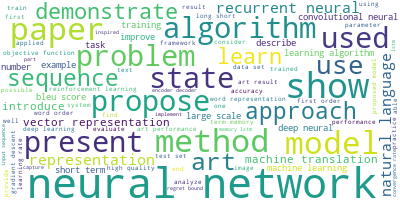

In [18]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


Prepare data for LDA Analysis

In [20]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


['deep', 'neural', 'networks', 'dnns', 'powerful', 'models', 'achieved', 'excellent', 'performance', 'difficult', 'learning', 'tasks', 'although', 'dnns', 'work', 'well', 'whenever', 'large', 'labeled', 'training', 'sets', 'available', 'cannot', 'used', 'map', 'sequences', 'sequences', 'paper', 'present', 'general']


In [22]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 4), (16, 1), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 2), (28, 1), (29, 1)]


LDA model training


In [23]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"data" + 0.014*"learning" + 0.011*"models" + 0.008*"model" + '
  '0.006*"based" + 0.006*"training" + 0.006*"one" + 0.006*"show" + '
  '0.006*"method" + 0.005*"performance"'),
 (1,
  '0.014*"model" + 0.011*"representations" + 0.011*"neural" + 0.009*"learning" '
  '+ 0.009*"word" + 0.008*"network" + 0.007*"state" + 0.007*"art" + '
  '0.007*"task" + 0.007*"training"'),
 (2,
  '0.011*"model" + 0.009*"word" + 0.009*"learning" + 0.008*"recurrent" + '
  '0.008*"neural" + 0.008*"method" + 0.007*"also" + 0.007*"training" + '
  '0.007*"sequence" + 0.007*"representations"'),
 (3,
  '0.010*"learning" + 0.010*"model" + 0.009*"lstm" + 0.009*"models" + '
  '0.009*"words" + 0.009*"neural" + 0.007*"networks" + 0.007*"sequence" + '
  '0.007*"based" + 0.006*"algorithm"'),
 (4,
  '0.014*"model" + 0.010*"neural" + 0.010*"networks" + 0.009*"learning" + '
  '0.008*"models" + 0.008*"based" + 0.006*"network" + 0.006*"method" + '
  '0.006*"training" + 0.006*"deep"'),
 (5,
  '0.012*"model" + 0.012*

Analyzing LDA model results


In [28]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./lda_modeling'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './lda_modeling'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.028009 -0.002472       1        1  14.900662
3     -0.030302  0.013119       2        1  12.804219
2     -0.055920  0.022887       3        1  11.305576
1     -0.043131  0.023244       4        1  10.631000
0     -0.005119 -0.024673       5        1  10.255408
7      0.103713  0.019114       6        1   9.415391
4      0.008493 -0.016075       7        1   8.845916
6      0.016123  0.043838       8        1   7.625981
8      0.033358 -0.000170       9        1   7.613947
9      0.000794 -0.078812      10        1   6.601899, topic_info=             Term         Freq        Total Category  logprob  loglift
344          data  9293.000000  9293.000000  Default  30.0000  30.0000
475     gradients  2375.000000  2375.000000  Default  29.0000  29.0000
61   optimization  4416.000000  4416.000000  Default  28.0000  28.0000
454          adam  1817.000000  1817.000000  Default  27.0000  27.0000
254       phrases  1920.000000  1920.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
359   information   271.929525  3133.887082  Topic10  -5.8417   0.2733
112          work   276.914998  3641.233512  Topic10  -5.8236   0.1414
110          word   295.343674  6682.754897  Topic10  -5.7591  -0.4013
59       networks   299.137359  8061.598844  Topic10  -5.7464  -0.5762
111         words   280.446364  5266.866695  Topic10  -5.8109  -0.2150

[921 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
7990       5  0.682161   a_s
4129       4  0.125661   aae
4129       6  0.753965   aae
10532      6  0.753562   abc
10532      8  0.125594   abc
...      ...       ...   ...
5927       9  0.090315  xcov
5927      10  0.722517  xcov
4537       4  0.109249  xnor
4537       7  0.764741  xnor
6248       7  0.598903   zhu

[4254 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 3, 2, 1, 8, 5, 7, 9, 10])